In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/BostonHousing.csv


In [2]:
# import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

In [3]:
# load the dataset.
iris_df = sns.load_dataset('iris')

In [4]:
# view of dataset.
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# we need to install the mlxtend library for the Exhasutic feature selection.
!pip install scikit-learn mlxtend

## Exhaustic Feature Selection.

### Logistic Regression Example.

In [6]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [7]:
lr = LogisticRegression(max_iter = 100)

efs = EFS(lr, min_features = 1, max_features = 3, scoring = 'accuracy', cv = 5)

In [8]:
efs.fit(iris_df.iloc[ : , 0 : 4], iris_df['species'])

Features: 14/14

ExhaustiveFeatureSelector(estimator=LogisticRegression(),
                          feature_groups=[[0], [1], [2], [3]], max_features=3)

In [9]:
print('Best score : ', efs.best_score_)
print('Best Features : ', efs.best_feature_names_)

Best score :  0.9666666666666668
Best Features :  ('sepal_length', 'petal_length', 'petal_width')


In [10]:
# How to Verify Available Classes in mlxtend 
import mlxtend.feature_selection as fs

dir(fs)

['ColumnSelector',
 'ExhaustiveFeatureSelector',
 'SequentialFeatureSelector',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'column_selector',
 'exhaustive_feature_selector',
 'sequential_feature_selector',
 'utilities']

In [11]:
# find the all subsets with 3 column that are created by efs.
efs.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': np.float64(0.7533333333333333),
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.56666667, 0.63333333]),
  'avg_score': np.float64(0.5666666666666667),
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667]),
  'avg_score': np.float64(0.8133333333333332),
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': 

In [12]:
efs.subsets_[3]

{'feature_idx': (3,),
 'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
 'avg_score': np.float64(0.96),
 'feature_names': ('petal_width',)}

In [13]:
efs.subsets_[3]['avg_score']

np.float64(0.96)

In [14]:
# convert the dictionary into the proper pandas df.

metric_dict = efs.subsets_
metrics_df = pd.DataFrame.from_dict(metric_dict, orient='index')

In [15]:
metrics_df.head()

,feature_idx,cv_scores,avg_score,feature_names
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)"
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal_width,)"
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)"
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.960000,"(petal_width,)"
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal_length, sepal_width)"


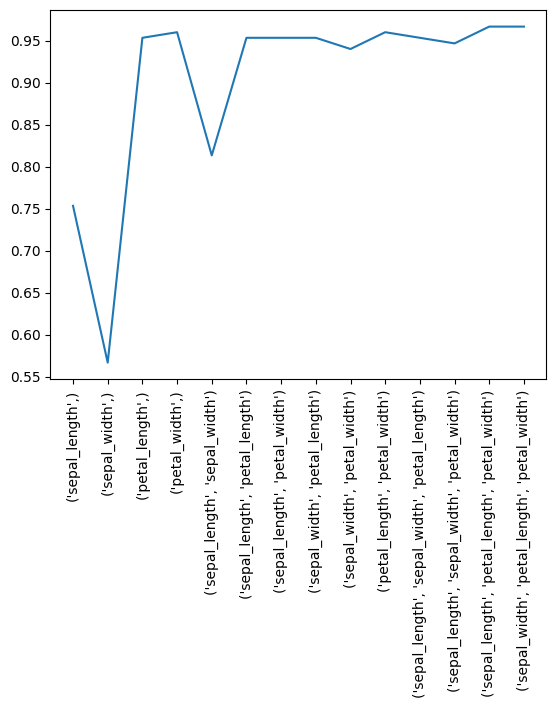

In [16]:
plt.plot([str(k) for k in metrics_df['feature_names']], metrics_df['avg_score'])
plt.xticks(rotation = 90)
plt.show()

### Linear Regression Example.

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [18]:
house_df = pd.read_csv('/kaggle/input/boston-housing-dataset/BostonHousing.csv')

In [19]:
house_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
house_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [21]:
house_df.columns[[0, 1, 2, 3, 4]]

Index(['crim', 'zn', 'indus', 'chas', 'nox'], dtype='object')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(house_df.iloc[ : , : -1], house_df['medv'], test_size = 0.2, random_state = 42)

In [23]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

imputer = SimpleImputer(strategy = 'mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [25]:
# baseline model that train with all the columns.
lr_model = LinearRegression()

print('Training : ', np.mean(cross_val_score(lr_model, X_train, y_train, scoring = 'r2', cv = 5)))
print('Testing : ', np.mean(cross_val_score(lr_model, X_test, y_test, scoring = 'r2', cv = 5)))

Training :  0.723921087248087
Testing :  0.5450345783403071


## Now we apply feature selection.

In [26]:
lr = LinearRegression()

efs = EFS(lr, min_features = 1, max_features = 13, scoring = 'r2', cv = 10, n_jobs = -1)

selector = efs.fit(X_train, y_train)

Features: 8191/8191

In [27]:
print('Best Score : ', selector.best_score_)

Best Score :  0.7015074387445381


In [28]:
print('Best Features : ', selector.best_feature_names_)

Best Features :  ('0', '3', '4', '5', '7', '8', '9', '10', '11', '12')


## Sequential Backward Elimination.

In [29]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [30]:
house_df = pd.read_csv('/kaggle/input/boston-housing-dataset/BostonHousing.csv')

In [31]:
house_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [32]:
X_train, X_test, y_train, y_test = train_test_split(house_df.iloc[ : , : -1], house_df['medv'], test_size = 0.2, random_state = 42)

In [33]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [34]:
# standarization. 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

imputer = SimpleImputer(strategy = 'mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [35]:
lr_model = LinearRegression()

print('Training : ', np.mean(cross_val_score(lr_model, X_train, y_train, scoring = 'r2', cv = 5)))
print('Testing : ', np.mean(cross_val_score(lr_model, X_test, y_test, scoring = 'r2', cv = 5)))

Training :  0.723921087248087
Testing :  0.5450345783403071


In [36]:
sfs = SFS(
    LinearRegression(), 
    k_features = 'best', 
    forward = False, 
    floating = False, 
    scoring = 'r2', 
    cv = 5
)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [37]:
sfs.k_feature_idx_

(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)

In [38]:
list(sfs.k_feature_idx_)

[0, 3, 4, 5, 7, 8, 9, 10, 11, 12]

In [39]:
house_df.columns[list(sfs.k_feature_idx_)]

Index(['crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b',
       'lstat'],
      dtype='object')

In [40]:
sfs.k_feature_names_

('0', '3', '4', '5', '7', '8', '9', '10', '11', '12')

In [41]:
sfs.k_score_

np.float64(0.7256181542598039)

In [42]:
# both are doing the same.

# sfs.get_metric_dict()
sfs.subsets_

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.77446852, 0.62526626, 0.75622513, 0.78744091, 0.67620462]),
  'avg_score': np.float64(0.723921087248087),
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12')},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.77979147, 0.6261808 , 0.75627309, 0.78732166, 0.67609932]),
  'avg_score': np.float64(0.7251332667181314),
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12')},
 11: {'feature_idx': (0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.78797916, 0.62164067, 0.75079145, 0.79432609, 0.67294813]),
  'avg_score': np.float64(0.7255371014495815),
  'feature_names': ('0', '2', '3', '4', '5', '7', '8', '9', '10', '11', '12')},
 10: {'feature_idx': (0, 3, 4, 5, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.78766824, 0.621592

In [43]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7744685222715532, 0.6252662599401638, 0.756...",0.723921,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.08056,0.062679,0.031339
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7797914702897921, 0.6261808004224834, 0.756...",0.725133,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.081331,0.063278,0.031639
11,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7879791643556757, 0.6216406676098658, 0.750...",0.725537,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.086848,0.06757,0.033785
10,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7876682395120262, 0.6215927556940324, 0.752...",0.725618,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.086939,0.067642,0.033821
9,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7791258956291145, 0.6185865982199297, 0.746...",0.723057,"(0, 3, 4, 5, 7, 8, 10, 11, 12)",0.086575,0.067358,0.033679
8,"(0, 3, 4, 5, 7, 10, 11, 12)","[0.7753308421430467, 0.6163947120380826, 0.736...",0.719358,"(0, 3, 4, 5, 7, 10, 11, 12)",0.092433,0.071916,0.035958
7,"(3, 4, 5, 7, 10, 11, 12)","[0.7688016814667499, 0.6171031087552707, 0.730...",0.717281,"(3, 4, 5, 7, 10, 11, 12)",0.090502,0.070414,0.035207
6,"(4, 5, 7, 10, 11, 12)","[0.7784736249720755, 0.6228607488740141, 0.717...",0.712386,"(4, 5, 7, 10, 11, 12)",0.092947,0.072316,0.036158
5,"(4, 5, 7, 10, 12)","[0.7521222654958002, 0.6205355391295843, 0.713...",0.699625,"(4, 5, 7, 10, 12)",0.090154,0.070143,0.035071
4,"(5, 7, 10, 12)","[0.7162011592321567, 0.6029715195648586, 0.703...",0.680714,"(5, 7, 10, 12)",0.086707,0.067461,0.033731


In [44]:
# calculate adjusted r2_score.
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1) 
    return 1 - (1 - r2) * coef

In [45]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7744685222715532, 0.6252662599401638, 0.756...",0.723921,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.08056,0.062679,0.031339,404,13,0.714718
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7797914702897921, 0.6261808004224834, 0.756...",0.725133,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.081331,0.063278,0.031639,404,12,0.716697
11,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7879791643556757, 0.6216406676098658, 0.750...",0.725537,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.086848,0.06757,0.033785,404,11,0.717835
10,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7876682395120262, 0.6215927556940324, 0.752...",0.725618,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.086939,0.067642,0.033821,404,10,0.718636
9,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7791258956291145, 0.6185865982199297, 0.746...",0.723057,"(0, 3, 4, 5, 7, 8, 10, 11, 12)",0.086575,0.067358,0.033679,404,9,0.71673
8,"(0, 3, 4, 5, 7, 10, 11, 12)","[0.7753308421430467, 0.6163947120380826, 0.736...",0.719358,"(0, 3, 4, 5, 7, 10, 11, 12)",0.092433,0.071916,0.035958,404,8,0.713674
7,"(3, 4, 5, 7, 10, 11, 12)","[0.7688016814667499, 0.6171031087552707, 0.730...",0.717281,"(3, 4, 5, 7, 10, 11, 12)",0.090502,0.070414,0.035207,404,7,0.712284
6,"(4, 5, 7, 10, 11, 12)","[0.7784736249720755, 0.6228607488740141, 0.717...",0.712386,"(4, 5, 7, 10, 11, 12)",0.092947,0.072316,0.036158,404,6,0.708039
5,"(4, 5, 7, 10, 12)","[0.7521222654958002, 0.6205355391295843, 0.713...",0.699625,"(4, 5, 7, 10, 12)",0.090154,0.070143,0.035071,404,5,0.695851
4,"(5, 7, 10, 12)","[0.7162011592321567, 0.6029715195648586, 0.703...",0.680714,"(5, 7, 10, 12)",0.086707,0.067461,0.033731,404,4,0.677513


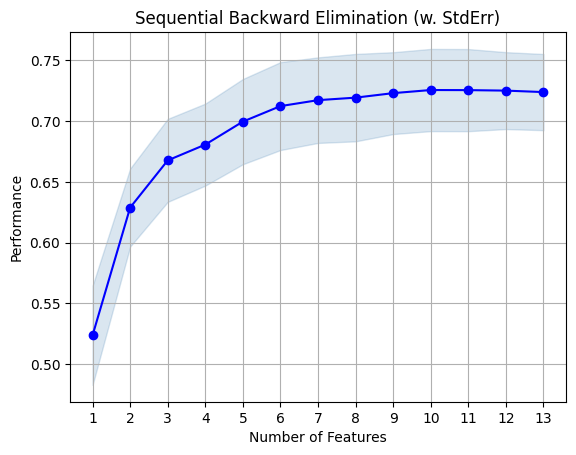

In [46]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [47]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

lr_model = LinearRegression()

print('Training : ', np.mean(cross_val_score(lr_model, X_train, y_train, scoring = 'r2', cv = 5)))
print('Testing : ', np.mean(cross_val_score(lr_model, X_test, y_test, scoring = 'r2', cv = 5)))

Training :  0.723921087248087
Testing :  0.5450345783403071


In [48]:
print(X_train_sel.shape)

(404, 10)
